## tf-idf
tf-idf是词袋方法基础上的一种简单扩展  它表示词频-逆文档频率

tf-idf计算的不是数据集中每个单词在每个文档中的原本计数 而是一个归一化的计数

bow(w,d) = 单词w在文档d中出现的次数

tf-idf(w,d) = bow(w,d) * N/(单词w出现在其中的文档数量) N是数据集中的文档总数

N/(单词w出现在其中的文档数量) 就是所谓的逆文档频率 如果一个单词在很多文档出现 其就越接近1 在不多文档中出现该值就越大

如果使用对数变换 tf-idf(w,d) = bow(w,d) * log(N/(单词w出现在其中的文档数量))
那么就是在很多文档中出现就接近于0 在少数文档中出现就会被放大

比如所有的文档有五句话'it is a puppy' 'it is a kitten' 'it is a cat' 'that is a dog' 'this is a pen'
可以看到经过tf-idf计算后 tf-idf(is) = 1*0 tf-idf(puppy) = 1*log(4)
因此可以看到tf-idf忽略了常见词 而使得罕见词被放大被突出

In [1]:
# tf-idf实践

In [13]:
import json
import pandas as pd
from sklearn.feature_extraction import text
from sklearn.linear_model import LogisticRegression
import sklearn.model_selection as modsel
import sklearn.preprocessing as preproc

In [2]:
dataset_root_path = 'feature_engineering/dataset/'

In [4]:
f = open(dataset_root_path + 'yelp_dataset/yelp_academic_dataset_business.json')

In [5]:
# 加载商家数据
biz_df = pd.DataFrame([json.loads(x) for x in f.readlines()])
f.close()

In [6]:
biz_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,86,1,"{'RestaurantsTableService': 'True', 'WiFi': 'u...","Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'..."
1,tCbdrRPZA0oiIYSmHG3J0w,Flying Elephants at PDX,7000 NE Airport Way,Portland,OR,97218,45.588906,-122.593331,4.0,126,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsAtt...","Salad, Soup, Sandwiches, Delis, Restaurants, C...","{'Monday': '5:0-18:0', 'Tuesday': '5:0-17:0', ..."
2,bvN78flM8NLprQ1a1y5dRg,The Reclaimory,4720 Hawthorne Ave,Portland,OR,97214,45.511907,-122.613693,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Restau...","Antiques, Fashion, Used, Vintage & Consignment...","{'Thursday': '11:0-18:0', 'Friday': '11:0-18:0..."
3,oaepsyvc0J17qwi8cfrOWg,Great Clips,2566 Enterprise Rd,Orange City,FL,32763,28.914482,-81.295979,3.0,8,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","Beauty & Spas, Hair Salons",None
4,PE9uqAjdw0E4-8mjGl3wVA,Crossfit Terminus,1046 Memorial Dr SE,Atlanta,GA,30316,33.747027,-84.353424,4.0,14,1,"{'GoodForKids': 'False', 'BusinessParking': '{...","Gyms, Active Life, Interval Training Gyms, Fit...","{'Monday': '16:0-19:0', 'Tuesday': '16:0-19:0'..."


In [7]:
biz_df['categories']

0         Gastropubs, Food, Beer Gardens, Restaurants, B...
1         Salad, Soup, Sandwiches, Delis, Restaurants, C...
2         Antiques, Fashion, Used, Vintage & Consignment...
3                                Beauty & Spas, Hair Salons
4         Gyms, Active Life, Interval Training Gyms, Fit...
                                ...                        
160580    Real Estate, Real Estate Services, Home Servic...
160581        Health Markets, Food, Specialty Food, Grocery
160582    Arts & Entertainment, Paint & Sip, Art Classes...
160583                Cuban, Sandwiches, Restaurants, Cafes
160584    Restaurants, Middle Eastern, Mediterranean, Pe...
Name: categories, Length: 160585, dtype: object

In [8]:
biz_df[biz_df['categories'].isnull()]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
804,EzXlnsWtBuRJw8avEMfBqw,AAA Cooper Transportation,1215 Wells Branch Pkwy,Pflugerville,TX,78660,30.438466,-97.661296,1.0,5,1,None,None,None
1725,VD_mB3i4GG-Ra-sFqlxzeA,Parkway Cleansing Center,695 Truman Hwy,Hyde Park,MA,02136,42.252549,-71.118810,3.0,6,1,None,None,None
2549,dp5RVEVtI8ZVW9xEZtcICw,Value Dry of Massachusetts,41 Belvidere St,Boston,MA,02115,42.346084,-71.085850,3.0,9,1,None,None,None
4342,ZyTTidbFgZPTk96ZS0li3A,Mail House Plus,4230 SE King Rd,Portland,OR,97222,45.447562,-122.619243,3.5,9,1,None,None,None
4676,AVfEUwqD-OoKXMB4LETcIw,Praxair Distribution,2801 Montopolis Dr,Austin,TX,78741,30.215451,-97.708661,3.5,5,1,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154464,I5wUBQDutIW-jsSPn1T-NA,Pilot Travel Center Number 344,4600 S Atlanta Rd SE,Smyrna,GA,30080,33.841019,-84.486094,2.0,10,0,None,None,None
157566,YczmQNLQ3QU6rbhlvSPObQ,Lee's Famous Recipe Chicken Corporate Headquar...,3343 Perimeter Hill Dr,Atlanta,GA,30303,33.914169,-84.294707,1.0,6,0,None,None,None
157613,-myDIHHnDp9elxbwkuUTog,Kel-Tec Cnc Industries,1485 Cox Rd,Cocoa,FL,32926,28.381731,-80.788720,3.0,11,1,None,None,None
158707,tL4FTK3nH3UyMogikY1ckg,Angie's List,2358 E Main St,Columbus,OH,43209,39.957405,-82.935903,1.0,31,1,None,None,None


In [9]:
# 丢弃空数据
biz_df.dropna(inplace=True)

In [10]:
biz_df[biz_df['categories'].isnull()]

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours


In [11]:
biz_df.reset_index(inplace=True)

In [12]:
biz_df.tail()

,index,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
123174,160578,rCTPX2ehHPFnHTe0aK9ZPQ,JDM Toyota & Honda Specialist,6629 E Colonial Dr,Orlando,FL,32807,28.566161,-81.298123,4.5,8,1,{'BusinessAcceptsCreditCards': 'True'},"Automotive, Tires, Towing, Auto Repair","{'Monday': '9:0-18:0', 'Tuesday': '9:0-18:0', ..."
123175,160579,d6iEdtgLKelWKtb-2UmE2A,Master Finish Mobile Auto Detailing,29 Greenwood Ave,Needham,MA,02492,42.282399,-71.225169,1.0,11,1,{'BusinessAcceptsCreditCards': 'True'},"Automotive, Auto Detailing","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
123176,160581,bQX-kwVTyZgcdZGEPzce6Q,Webb's Honey,21777 State Rd 520,Orlando,FL,32833,28.499836,-81.047478,4.5,18,1,"{'RestaurantsTakeOut': 'True', 'RestaurantsPri...","Health Markets, Food, Specialty Food, Grocery","{'Monday': '10:0-18:0', 'Tuesday': '10:0-18:0'..."
123177,160582,wvFZ06nmPmQ2-IVoPqVYLA,Painting with a Twist,2164 S Chickasaw Trl,Orlando,FL,32825,28.511615,-81.270020,5.0,8,0,"{'DogsAllowed': 'False', 'ByAppointmentOnly': ...","Arts & Entertainment, Paint & Sip, Art Classes...","{'Monday': '0:0-0:0', 'Wednesday': '12:0-17:0'..."
123178,160584,ngmLL5Y5OT-bYHKU0kKrYA,Zora Grille,1370 E Altamonte Dr,Altamonte Springs,FL,32701,28.663047,-81.346728,4.5,82,0,"{'RestaurantsReservations': 'True', 'OutdoorSe...","Restaurants, Middle Eastern, Mediterranean, Pe...","{'Tuesday': '17:0-21:0', 'Wednesday': '17:0-21..."


In [13]:
biz_df['categories']

0         Gastropubs, Food, Beer Gardens, Restaurants, B...
1         Salad, Soup, Sandwiches, Delis, Restaurants, C...
2         Antiques, Fashion, Used, Vintage & Consignment...
3         Gyms, Active Life, Interval Training Gyms, Fit...
4                                         Restaurants, Thai
                                ...                        
123174               Automotive, Tires, Towing, Auto Repair
123175                           Automotive, Auto Detailing
123176        Health Markets, Food, Specialty Food, Grocery
123177    Arts & Entertainment, Paint & Sip, Art Classes...
123178    Restaurants, Middle Eastern, Mediterranean, Pe...
Name: categories, Length: 123179, dtype: object

In [14]:
# 过滤出有夜店和餐馆标签的行

two_biz = biz_df[biz_df.apply(lambda x: 'Nightlife' in x['categories']
                                        or 'Restaurants' in x['categories'],
                              axis=1)]

In [15]:
# 加载点评数据

review_f = open(dataset_root_path + 'yelp_dataset/yelp_academic_dataset_review.json')

In [16]:
review_df = pd.DataFrame([json.loads(x) for x in review_f.readlines()])
review_f.close()

In [17]:
review_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,lWC-xP3rd6obsecCYsGZRg,ak0TdVmGKo4pwqdJSTLwWw,buF9druCkbuXLX526sGELQ,4.0,3,1,1,Apparently Prides Osteria had a rough summer a...,2014-10-11 03:34:02
1,8bFej1QE5LXp4O05qjGqXA,YoVfDbnISlW0f7abNQACIg,RA4V8pr014UyUbDvI-LW2A,4.0,1,0,0,This store is pretty good. Not as great as Wal...,2015-07-03 20:38:25
2,NDhkzczKjLshODbqDoNLSg,eC5evKn1TWDyHCyQAwguUw,_sS2LBIGNT5NQb6PD1Vtjw,5.0,0,0,0,I called WVM on the recommendation of a couple...,2013-05-28 20:38:06
3,T5fAqjjFooT4V0OeZyuk1w,SFQ1jcnGguO0LYWnbbftAA,0AzLzHfOJgL7ROwhdww2ew,2.0,1,1,1,I've stayed at many Marriott and Renaissance M...,2010-01-08 02:29:15
4,sjm_uUcQVxab_EeLCqsYLg,0kA0PAJ8QFMeveQWHFqz2A,8zehGz9jnxPqXtOc7KaJxA,4.0,0,0,0,The food is always great here. The service fro...,2011-07-28 18:05:01


In [18]:
review_df.shape

(8635403, 9)

In [19]:
two_biz_reviews = two_biz.merge(review_df, on='business_id', how='inner')

In [20]:
two_biz_reviews.shape

(5504551, 23)

In [22]:
review_df[0:1]

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,lWC-xP3rd6obsecCYsGZRg,ak0TdVmGKo4pwqdJSTLwWw,buF9druCkbuXLX526sGELQ,4.0,3,1,1,Apparently Prides Osteria had a rough summer a...,2014-10-11 03:34:02


In [21]:
two_biz_reviews[0:1]

,index,business_id,name,address,city,state,postal_code,latitude,longitude,stars_x,...,categories,hours,review_id,user_id,stars_y,useful,funny,cool,text,date
0,0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,921 Pearl St,Boulder,CO,80302,40.017544,-105.283348,4.0,...,"Gastropubs, Food, Beer Gardens, Restaurants, B...","{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",bkHUOCicGZ856vpvcWuW7Q,93z0yh-sUpGZS-cSKu6xxA,5.0,1,0,0,Stopped in on a busy Friday night. Despite the...,2018-03-04 00:59:21


In [23]:
two_biz_reviews_ = two_biz_reviews.iloc[0:300000]

In [25]:
two_biz_reviews_ = two_biz_reviews_[['business_id','name','stars_y','text','categories']]

In [26]:
two_biz_reviews_.head()

,business_id,name,stars_y,text,categories
0,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,5.0,Stopped in on a busy Friday night. Despite the...,"Gastropubs, Food, Beer Gardens, Restaurants, B..."
1,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,2.0,Went there about 1 PM on a Monday. It wasn't ...,"Gastropubs, Food, Beer Gardens, Restaurants, B..."
2,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,5.0,This was the place the be on Friday Night! If ...,"Gastropubs, Food, Beer Gardens, Restaurants, B..."
3,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,4.0,Went to this place with my family over the wee...,"Gastropubs, Food, Beer Gardens, Restaurants, B..."
4,6iYb2HFDywm3zjuRg0shjw,Oskar Blues Taproom,4.0,"Stopped on a midweek afternoon, and so glad th...","Gastropubs, Food, Beer Gardens, Restaurants, B..."


In [27]:
# 设置目标列 Nightlife变为True Restaurants 变为False
two_biz_reviews_['target'] = two_biz_reviews_.apply(lambda x: 'Nightlife' in x['categories'], axis=1)

<ipython-input-27-a0b037a78ebe>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  two_biz_reviews_['target'] = two_biz_reviews_.apply(lambda x: 'Nightlife' in x['categories'], axis=1)


In [29]:
two_biz_reviews_['target'].describe()

count     300000
unique         2
top        False
freq      200630
Name: target, dtype: object

In [30]:
two_biz_reviews_.to_pickle('feature_engineering/chapter4/two_biz_reviews_.pkl')

In [3]:
two_biz_reviews_ = pd.read_pickle('feature_engineering/chapter4/two_biz_reviews_.pkl')

In [4]:
two_biz_reviews_.shape

(300000, 6)

In [5]:
nightlife = two_biz_reviews_[two_biz_reviews_.apply(
    lambda x: 'Nightlife' in x['categories'],
    axis = 1
)]

In [6]:
nightlife.shape

(99370, 6)

In [7]:
restaurants = two_biz_reviews_[two_biz_reviews_.apply(
    lambda x: 'Restaurants' in x['categories'],
    axis = 1
)]

In [8]:
restaurants.shape

(290823, 6)

# 数据集处理
由于nightlife和restaurants是不平衡的数据集 即二者在样本中数量差距很大
这种情况下 大部分的模型都会努力用于拟合优势类别
在本问题中 由于样本数量都很大 所以我们可以进行降采样的方法 使得二者数量类似

In [9]:
# 对夜店取10% 对餐馆取3.3%

nightlife_subset = nightlife.sample(frac=0.1, random_state=123)
nightlife_subset.shape

(9937, 6)

In [11]:
restaurant_subset = restaurants.sample(frac = 0.033, random_state=123)
restaurant_subset.shape

(9597, 6)

In [12]:
combined = pd.concat([nightlife_subset, restaurant_subset])

In [17]:
train_data, test_data = modsel.train_test_split(combined,
                                                train_size=0.8,
                                                random_state=123)

In [18]:
train_data.shape

(15627, 6)

In [19]:
test_data.shape

(3907, 6)

In [ ]:
# 处理完数据后 要对不同的处理方式所导致的分类效果进行比较
# 分别有词袋法/ tf-idf / 在词袋基础上的l2归一化

In [20]:
#  词袋法
bow_transform = text.CountVectorizer()
X_tr_bow = bow_transform.fit_transform(train_data['text'])
X_te_bow = bow_transform.transform(test_data['text'])

In [21]:
len(bow_transform.vocabulary_)

29300

In [25]:
bow_transform.vocabulary_.keys()

dict_keys(['do', 'not', 'go', 'here', 'literally', 'the', 'worst', 'have', 'ever', 'been', 'treated', 'love', 'southie', 'so', 'much', 'and', 'was', 'excited', 'to', 'try', 'new', 'bar', 'this', 'one', 'is', 'disappointing', 'never', 'experienced', 'more', 'rude', 'waitress', 'in', 'my', 'entire', 'life', 'we', 'were', 'out', 'for', 'sunday', 'drive', 'late', 'lunch', 'many', 'places', 'tried', 'closed', 'because', 'it', 'glad', 'that', 'found', 'restaurant', 'open', 'very', 'picky', 'eater', 'hesitant', 'about', 'some', 'of', 'choices', 'but', 'pleasantly', 'surprised', 'happy', 'gave', 'bartaco', 'started', 'off', 'with', 'fresh', 'guacamole', 'which', 'tasty', 'too', 'spicy', 'taste', 'chips', 'also', 'warm', 'tasted', 'great', 'had', 'rice', 'bowl', 'sesame', 'ribeye', 'minus', 'kimchi', 'delicious', 'flavors', 'mix', 'although', 'bit', 'server', 'did', 'warn', 'me', 'happily', 'order', 'again', 'then', 'ordered', 'pork', 'pastor', 'taco', 'wasn', 'at', 'all', 'pineapple', 'than', 

In [26]:
bow_transform.vocabulary_['do']

8145

In [27]:
bow_transform.vocabulary_['overpower']

18533

In [30]:
X_tr_bow
# X_tr_bow的维度是15627 * 18533 就是有15627个句子 每个句子用维度为18533的向量表示

<15627x29300 sparse matrix of type '<class 'numpy.int64'>'
	with 1092603 stored elements in Compressed Sparse Row format>

In [31]:
# 使用tf-idf对词袋法进行过滤
tfidf_trfm = text.TfidfTransformer(norm=None)
X_tr_tfidf = tfidf_trfm.fit_transform(X_tr_bow)
X_te_tfidf = tfidf_trfm.transform(X_te_bow)

In [32]:
# 对词袋法进行l2归一化
X_tr_l2 = preproc.normalize(X_tr_bow, axis=0)
X_te_l2 = preproc.normalize(X_te_bow, axis=0)

In [37]:
y_tr = train_data['target']
y_te = test_data['target']

In [33]:
type(X_te_tfidf)

scipy.sparse.csr.csr_matrix

In [36]:
X_tr_tfidf

<15627x29300 sparse matrix of type '<class 'numpy.float64'>'
	with 1092603 stored elements in Compressed Sparse Row format>

In [ ]:
# 由于上述的词袋和tf-idf的转化器的训练都是使用训练数据
# 为了防止数据泄露 使用训练集的转化器作用于测试集上
# 但是这样做测试集在归一化的情况下 可能取值范围不是0-1 或者在分词的时候 出现了训练集中没见过的词
# 如果不是0-1没有办法 如果是本问题的分词 可以选择看不见没见过的词(删掉) 也可以用垃圾词来统一表示

In [ ]:
# 使用逻辑回归进行分类

In [38]:
def simple_logistic_classify(X_tr, y_tr, X_test, y_test, description):
    m = LogisticRegression().fit(X_tr,y_tr)
    s = m.score(X_test, y_test)
    print('Test score with', description, 'feature: ', s)
    return m

In [39]:
m1 = simple_logistic_classify(X_tr_bow, y_tr, X_te_bow, y_te, 'bow')
m2 = simple_logistic_classify(X_tr_tfidf, y_tr, X_te_tfidf, y_te, 'tf-idf')
m3 = simple_logistic_classify(X_tr_l2, y_tr, X_te_tfidf, y_te, 'l2-normalized')

/home/wy/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test score with bow feature:  0.7391860762733555


/home/wy/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test score with tf-idf feature:  0.7243409265421039
Test score with l2-normalized feature:  0.7599180957256206


In [ ]:
# 事与愿违 tf-idf并不好
# 使用正则化对逻辑回归进行调优

In [ ]:
# 一般比较模型的时候需要对超参数进行调优 因为不同的模型不仅受到数据的影响 同时也受到超参数的影响
# 如果A模型比B模型差 有可能是A并不在自己的最优超参数上 而B在 并不能武断的说A模型比B模型差

In [ ]:
# 使用网格搜索对逻辑回归进行调优

In [40]:
param_grid_ = {'C': [1e-5,1e-3, 1e-1, 1e0, 1e1, 1e2]}

In [41]:
bow_search = modsel.GridSearchCV(LogisticRegression(), cv=5, param_grid=param_grid_)
bow_search.fit(X_tr_bow, y_tr)

/home/wy/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/wy/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1e-05, 0.001, 0.1, 1.0, 10.0, 100.0]})

In [42]:
tfidf_search = modsel.GridSearchCV(LogisticRegression(), cv=5, param_grid=param_grid_)
tfidf_search.fit(X_tr_tfidf, y_tr)

/home/wy/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/wy/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1e-05, 0.001, 0.1, 1.0, 10.0, 100.0]})

In [43]:
l2_search = modsel.GridSearchCV(LogisticRegression(), cv=5, param_grid=param_grid_)
l2_search.fit(X_tr_l2, y_tr)

/home/wy/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/wy/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1e-05, 0.001, 0.1, 1.0, 10.0, 100.0]})

In [44]:
bow_search.cv_results_['mean_test_score']

array([0.66020349, 0.68151282, 0.75107192, 0.74480104, 0.73737821,
       0.73545848])

In [45]:
tfidf_search.cv_results_['mean_test_score']

array([0.66052342, 0.75241565, 0.73692968, 0.7206116 , 0.72016311,
       0.72349074])

In [46]:
l2_search.cv_results_['mean_test_score']

array([0.66020349, 0.66020349, 0.66020349, 0.6945668 , 0.74716876,
       0.74096143])

In [47]:
search_result = pd.DataFrame.from_dict({
    'bow' : bow_search.cv_results_['mean_test_score'],
    'tfidf':tfidf_search.cv_results_['mean_test_score'],
    'l2': l2_search.cv_results_['mean_test_score']
})

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

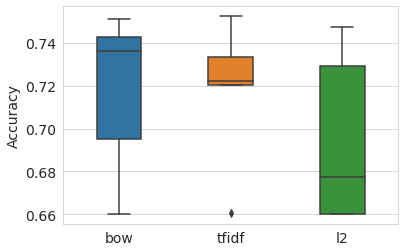

In [51]:
sns.set_style('whitegrid')
ax = sns.boxplot(data=search_result, width=0.4)
ax.set_ylabel('Accuracy', size=14)
ax.tick_params(labelsize= 14)

In [52]:
search_result

,bow,tfidf,l2
0,0.660203,0.660523,0.660203
1,0.681513,0.752416,0.660203
2,0.751072,0.736930,0.660203
3,0.744801,0.720612,0.694567
4,0.737378,0.720163,0.747169
5,0.735458,0.723491,0.740961


数据矩阵用以表示文本信息 表示的方式就是字典
其统计了每个词出现的次数 由于字典的维度很高 那么矩阵中多数元素都是0 成为稀疏矩阵
特征缩放实际上是对于矩阵上的列操作 **tf-idf和l2归一化都是对整个列乘以一个常数**

特征缩放(包括l2正则和tf-idf)本质上都是加快收敛速度 使得数据矩阵有明显更少的条件数